In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape

(167, 10)

## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


There seems to be no null values, therefore we can proceed with outlier detection

In [5]:
df.gdpp = df.gdpp.astype('float64')
df.income = df.income.astype('float64')

In [6]:
df.exports = df.exports / 100.0 * df.gdpp
df.health = df.health / 100.0 * df.gdpp
df.imports = df.imports / 100.0 * df.gdpp

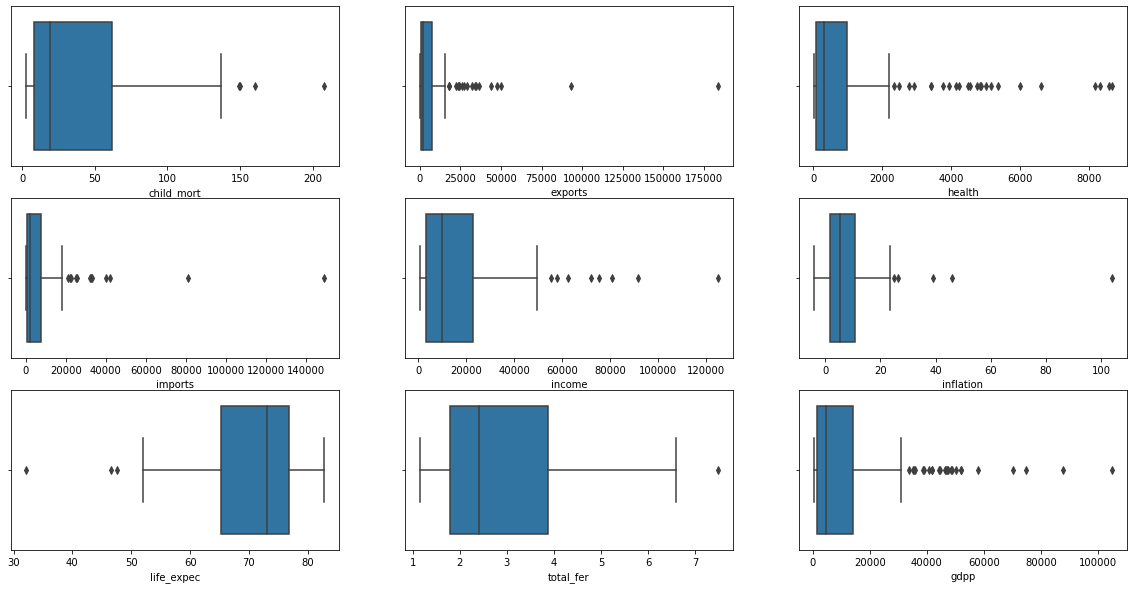

In [7]:
numcols = df.describe().columns.to_list()
fig, ax = plt.subplots(3,3, figsize= (20,10))
for i,col in enumerate(numcols):
    sns.boxplot(df[col], ax=ax.reshape(-1,)[i])

* There are outliers in every numerical column, but not every outlier can be removed which is domain specific outliers
* We can also see higher inflation values above 50, which is not good for a country, so it is advised to keep that data point<br>
* The GDPP variable has too many outliers at the higher range, since our main moto is to find countries that need immediate help, higher GDPP countries obviously doesnt need any immediate help<br>
Therefore, we are going to remove outliers from **GDPP** variable which in turn remvoes the **income** variable's outliers

In [8]:
df = df[df.gdpp < df.gdpp.describe()['75%']]
df.shape

(125, 10)

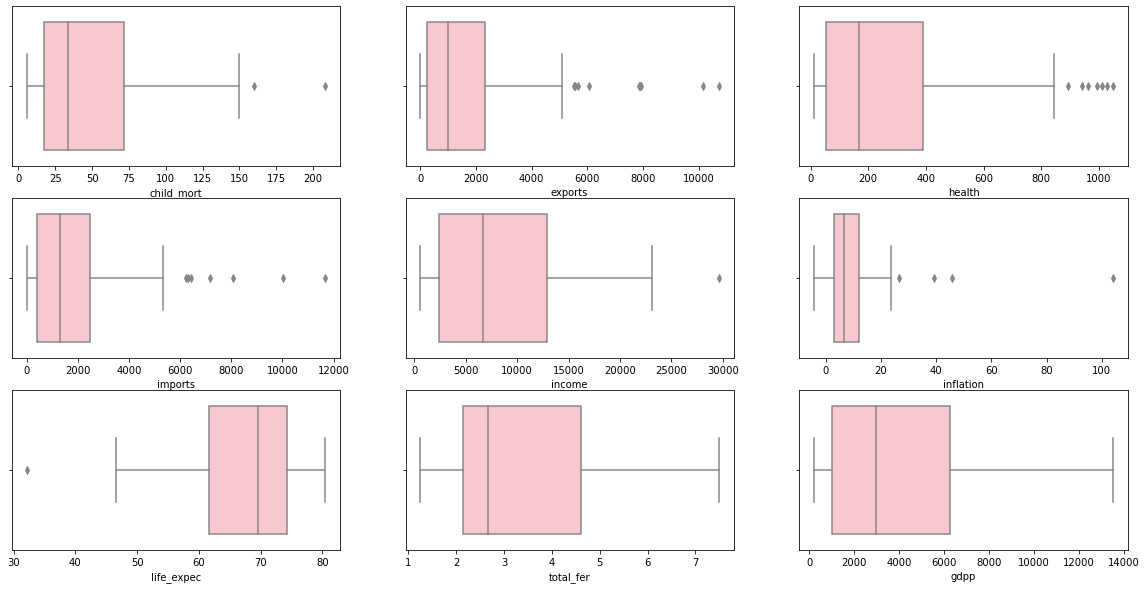

In [113]:
#rerunning the boxplot
numcols = df.describe().columns.to_list()
fig, ax = plt.subplots(3,3, figsize= (20,10))
for i,col in enumerate(numcols):
    sns.boxplot(df[col], ax=ax.reshape(-1,)[i], color='pink')

This Data looks good and we can proceed with Data Visualisations. The outliers in the features remaining does not affect the model in a bad way

## Data Visualisation

<AxesSubplot:xlabel='life_expec', ylabel='Count'>

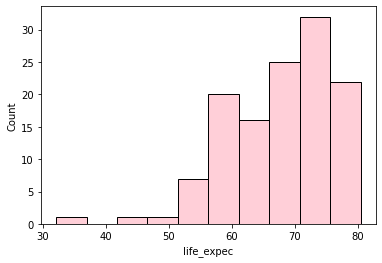

In [114]:
sns.histplot(df.life_expec, color= 'pink')

- There are more than 50 countries whose average life expentency is more than 60
- There are less than 5 countries with avergae life expentency of less then 50

<AxesSubplot:xlabel='health', ylabel='Count'>

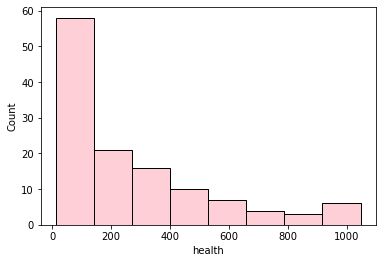

In [115]:
sns.histplot(df.health, color= 'pink')

- Most countries (nearly 60) spends on average 100 million from the gdpp
- Less than 10 countries spends about 1000million from the gdpp

<AxesSubplot:xlabel='income', ylabel='child_mort'>

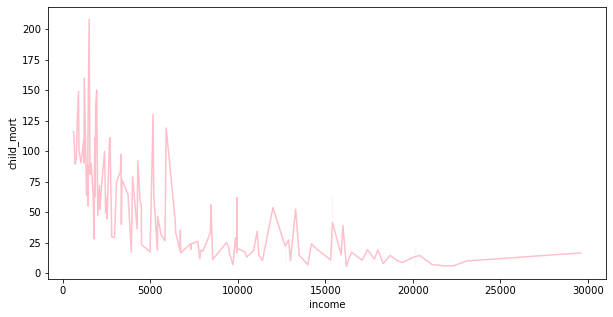

In [116]:
plt.figure(figsize= (10,5))
sns.lineplot(data=df, x='income', y='child_mort', color= 'pink')

- Child mortality declines as the income of the country increases
- Countries with net income of less than 5000, 100 children die on average for every 1000 live births
- Countries with net income 22000, child mortality rate almost has a plateau with less than 25 deaths for every 1000 live births

<AxesSubplot:xlabel='income', ylabel='total_fer'>

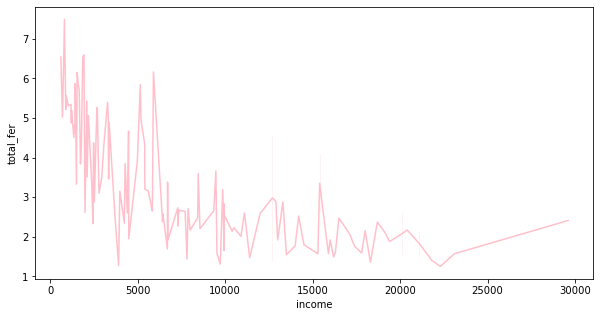

In [117]:
plt.figure(figsize= (10,5))
sns.lineplot(data=df, x='income',y='total_fer', color= 'pink')

- Families of Countries with net income higher than 20000 tends to have less than 3 children
- Families of Countries with less income of less than 5000 mostly have more than 5 children

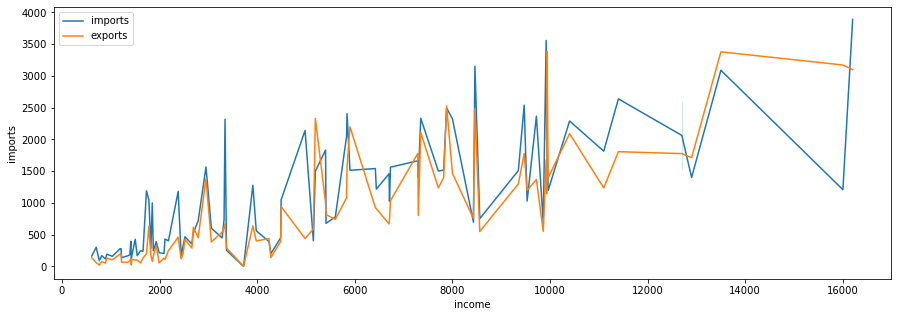

In [30]:
plt.figure(figsize= (15,5))
sns.lineplot(data=df, x='income', y='imports', label='imports')
sns.lineplot(data=df, x='income', y='exports', label= 'exports')
plt.legend()

- Imports are more than exports where the income of the country is less than 5000
- Countries have almost same rate of imports and exports where the net income is between 5000 and 9000
- Countries with net income more than 9000 does more exports than imports

# Data Preparation

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [14]:
scaler = StandardScaler()
dfScaled = pd.DataFrame(scaler.fit_transform(df[numcols]))
dfScaled.columns = numcols
dfScaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.025354,-0.802601,-0.837514,-0.805090,-1.013367,0.025283,-1.395361,1.627193,-0.968361
1,-0.776674,-0.281379,0.000848,0.051805,0.252713,-0.409665,1.048417,-1.067820,-0.020714
2,-0.514695,-0.010012,-0.303044,-0.237515,0.704667,0.610485,1.072734,-0.266425,0.078418
3,1.730496,0.222670,-0.619787,-0.181390,-0.360544,1.164055,-0.921195,1.846930,-0.170751
4,-0.930924,1.825604,1.736225,2.612502,1.648140,-0.677663,1.109208,-0.757602,2.152150


### Hopkins Test

In [17]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [34]:
scores = []
for i in range(10):
    scores.append(hopkins(dfScaled))
print('Average hopkins score: ', sum(scores)/len(scores))

Average hopkins score:  0.8554491758326062


0.85 average Hopkins score is a good number i.e., there is no randomness in the values present

# Model Building

### Silhoutte score and Elbow method


In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n_clusters= 2, the silhoutte score is: 0.3882853947975552
for n_clusters= 3, the silhoutte score is: 0.3683534308559713
for n_clusters= 4, the silhoutte score is: 0.37511674247373644
for n_clusters= 5, the silhoutte score is: 0.3363484500395424
for n_clusters= 6, the silhoutte score is: 0.2689742417250885
for n_clusters= 7, the silhoutte score is: 0.2630603016026452
for n_clusters= 8, the silhoutte score is: 0.2153514904432701
for n_clusters= 9, the silhoutte score is: 0.21829782096221836


<AxesSubplot:>

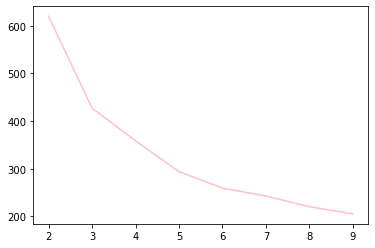

In [118]:
#silhoutte score and elbow method
cost = []
for i in range(2,10):
    model = KMeans(n_clusters= i, max_iter=50) #model for every cluster from 2 to 9
    model.fit_predict(dfScaled)
    
    cost.append(model.inertia_)
    
    labels = model.labels_
    silAvg = silhouette_score(dfScaled, labels)
    print('for n_clusters= {0}, the silhoutte score is: {1}'.format(i, silAvg))
sns.lineplot(range(2,10), cost, color='pink')

Here, 3 seems to be a good number by comparing both elbow method and silhoutte score but we can also verify by using 4 clusters

## K means - K = 3

In [56]:
kmeans = KMeans(n_clusters= 3, max_iter= 50)
kmeans.fit_predict(dfScaled)
labels = kmeans.labels_
labels

array([1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 1,
       2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 1, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 1, 1,
       0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 0, 0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 1, 2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 1])

In [57]:
dfKmeans = df.copy()
dfKmeans['labels'] = labels

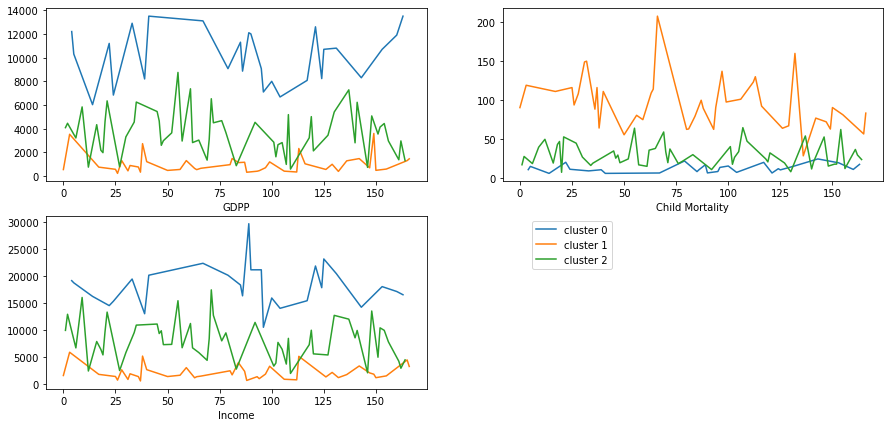

In [58]:
fig, ax = plt.subplots(2, 2, figsize= (15,7))

ax[0,0].plot(dfKmeans[dfKmeans.labels == 0].gdpp, label= 'cluster 0')
ax[0,0].plot(dfKmeans[dfKmeans.labels == 1].gdpp, label= 'cluster 1')
ax[0,0].plot(dfKmeans[dfKmeans.labels == 2].gdpp, label= 'cluster 2')
ax[0,0].set_xlabel('GDPP')

ax[0,1].plot(dfKmeans[dfKmeans.labels == 0].child_mort, label= 'cluster 0')
ax[0,1].plot(dfKmeans[dfKmeans.labels == 1].child_mort, label= 'cluster 1')
ax[0,1].plot(dfKmeans[dfKmeans.labels == 2].child_mort, label= 'cluster 2')
ax[0,1].set_xlabel('Child Mortality')

ax[1,0].plot(dfKmeans[dfKmeans.labels == 0].income, label= 'cluster 0')
ax[1,0].plot(dfKmeans[dfKmeans.labels == 1].income, label= 'cluster 1')
ax[1,0].plot(dfKmeans[dfKmeans.labels == 2].income, label= 'cluster 2')
ax[1,0].set_xlabel('Income')

ax[1,1].axis('off')
ax[1,0].legend(bbox_to_anchor=(1.5, 1))

In [59]:
pd.DataFrame({'GDPP (Cluster 0)': dfKmeans[dfKmeans.labels == 0].gdpp.describe(),
             'GDPP (Cluster 1)': dfKmeans[dfKmeans.labels == 1].gdpp.describe(),
             'GDPP (Cluster 2)': dfKmeans[dfKmeans.labels == 2].gdpp.describe(),
             'Child_mort (Cluster 0)': dfKmeans[dfKmeans.labels == 0].child_mort.describe(),
             'Child_mort (Cluster 1)': dfKmeans[dfKmeans.labels == 1].child_mort.describe(),
             'Child_mort (Cluster 2)': dfKmeans[dfKmeans.labels == 2].child_mort.describe(),
             'Income (Cluster 0)': dfKmeans[dfKmeans.labels == 0].income.describe(),
             'Income (Cluster 1)': dfKmeans[dfKmeans.labels == 1].income.describe(),
             'Income (Cluster 2)': dfKmeans[dfKmeans.labels == 2].income.describe()})

,GDPP (Cluster 0),GDPP (Cluster 1),GDPP (Cluster 2),Child_mort (Cluster 0),Child_mort (Cluster 1),Child_mort (Cluster 2),Income (Cluster 0),Income (Cluster 1),Income (Cluster 2)
count,27.000000,42.000000,56.000000,27.000000,42.000000,56.00000,27.000000,42.000000,56.000000
mean,10120.740741,1011.238095,3663.964286,12.185185,95.797619,30.13750,18140.740741,2178.880952,8077.678571
std,2284.933808,779.301777,1864.491605,5.393208,33.582657,15.42135,3833.782954,1323.718970,3700.219154
min,6030.000000,231.000000,592.000000,5.500000,28.100000,6.90000,10500.000000,609.000000,1990.000000
25%,8215.000000,502.750000,2637.500000,7.850000,72.600000,18.10000,15650.000000,1360.000000,5407.500000
50%,10700.000000,733.000000,3380.000000,10.600000,90.400000,26.30000,18000.000000,1755.000000,7850.000000
75%,12050.000000,1272.500000,4665.000000,15.800000,113.250000,39.40000,20250.000000,2682.500000,10070.000000
max,13500.000000,3600.000000,8750.000000,24.100000,208.000000,64.40000,29600.000000,5900.000000,17400.000000


### K means - K = 4

In [60]:
kmeans = KMeans(n_clusters= 4, max_iter= 50)
kmeans.fit_predict(dfScaled)
labels = kmeans.labels_
labels

array([0, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0,
       1, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 2, 2, 0, 0,
       2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 3, 0,
       2, 1, 1, 1, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 2, 1, 0, 1,
       0, 0, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 0, 0])

In [61]:
dfKmeans = df.copy()
dfKmeans['labels'] = labels

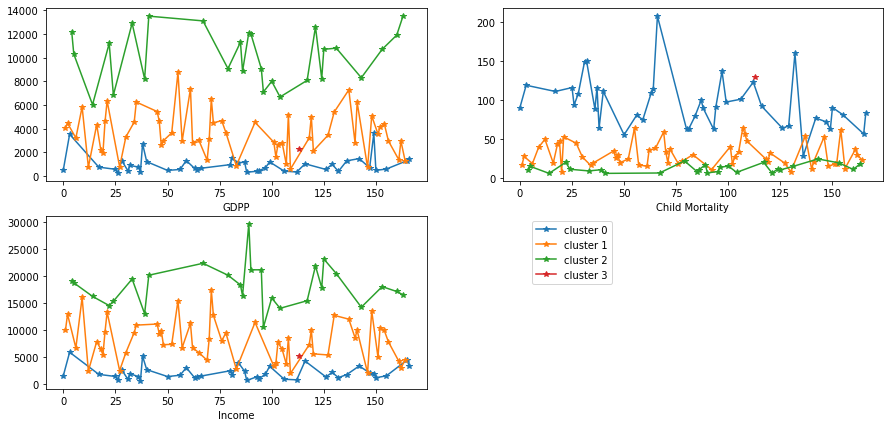

In [66]:
fig, ax = plt.subplots(2, 2, figsize= (15,7))

ax[0,0].plot(dfKmeans[dfKmeans.labels == 0].gdpp, label= 'cluster 0', marker= '*')
ax[0,0].plot(dfKmeans[dfKmeans.labels == 1].gdpp, label= 'cluster 1', marker= '*')
ax[0,0].plot(dfKmeans[dfKmeans.labels == 2].gdpp, label= 'cluster 2', marker= '*')
ax[0,0].plot(dfKmeans[dfKmeans.labels == 3].gdpp, label= 'cluster 3', marker= '*')
ax[0,0].set_xlabel('GDPP')

ax[0,1].plot(dfKmeans[dfKmeans.labels == 0].child_mort, label= 'cluster 0', marker= '*')
ax[0,1].plot(dfKmeans[dfKmeans.labels == 1].child_mort, label= 'cluster 1', marker= '*')
ax[0,1].plot(dfKmeans[dfKmeans.labels == 2].child_mort, label= 'cluster 2', marker= '*')
ax[0,1].plot(dfKmeans[dfKmeans.labels == 3].child_mort, label= 'cluster 3', marker= '*')
ax[0,1].set_xlabel('Child Mortality')

ax[1,0].plot(dfKmeans[dfKmeans.labels == 0].income, label= 'cluster 0', marker= '*')
ax[1,0].plot(dfKmeans[dfKmeans.labels == 1].income, label= 'cluster 1', marker= '*')
ax[1,0].plot(dfKmeans[dfKmeans.labels == 2].income, label= 'cluster 2', marker= '*')
ax[1,0].plot(dfKmeans[dfKmeans.labels == 3].income, label= 'cluster 3', marker= '*')
ax[1,0].set_xlabel('Income')

ax[1,1].axis('off')
ax[1,0].legend(bbox_to_anchor=(1.5, 1))

when modelling is done for 4 clusters, the 4th cluster has only one single data point, and that data point seems to be a part of a cluster (cluster that is formed in the middle) and does not variation from that cluster as well

In [68]:
pd.DataFrame({'GDPP (Cluster 0)': dfKmeans[dfKmeans.labels == 0].gdpp.describe(),
             'GDPP (Cluster 1)': dfKmeans[dfKmeans.labels == 1].gdpp.describe(),
             'GDPP (Cluster 2)': dfKmeans[dfKmeans.labels == 2].gdpp.describe(),
             'GDPP (Cluster 3)': dfKmeans[dfKmeans.labels == 3].gdpp.describe(),
             'Child_mort (Cluster 0)': dfKmeans[dfKmeans.labels == 0].child_mort.describe(),
             'Child_mort (Cluster 1)': dfKmeans[dfKmeans.labels == 1].child_mort.describe(),
             'Child_mort (Cluster 2)': dfKmeans[dfKmeans.labels == 2].child_mort.describe(),
             'Child_mort (Cluster 3)': dfKmeans[dfKmeans.labels == 3].child_mort.describe(),
             'Income (Cluster 0)': dfKmeans[dfKmeans.labels == 0].income.describe(),
             'Income (Cluster 1)': dfKmeans[dfKmeans.labels == 1].income.describe(),
             'Income (Cluster 2)': dfKmeans[dfKmeans.labels == 2].income.describe(),
             'Income (Cluster 3)': dfKmeans[dfKmeans.labels == 3].income.describe()})

,GDPP (Cluster 0),GDPP (Cluster 1),GDPP (Cluster 2),GDPP (Cluster 3),Child_mort (Cluster 0),Child_mort (Cluster 1),Child_mort (Cluster 2),Child_mort (Cluster 3),Income (Cluster 0),Income (Cluster 1),Income (Cluster 2),Income (Cluster 3)
count,41.000000,56.000000,27.000000,1.0,41.000000,56.00000,27.000000,1.0,41.000000,56.000000,27.000000,1.0
mean,979.073171,3663.964286,10120.740741,2330.0,94.963415,30.13750,12.185185,130.0,2106.414634,8077.678571,18140.740741,5150.0
std,760.233694,1864.491605,2284.933808,NaN,33.556391,15.42135,5.393208,NaN,1252.982980,3700.219154,3833.782954,NaN
min,231.000000,592.000000,6030.000000,2330.0,28.100000,6.90000,5.500000,130.0,609.000000,1990.000000,10500.000000,5150.0
25%,488.000000,2637.500000,8215.000000,2330.0,71.900000,18.10000,7.850000,130.0,1350.000000,5407.500000,15650.000000,5150.0
50%,708.000000,3380.000000,10700.000000,2330.0,90.300000,26.30000,10.600000,130.0,1730.000000,7850.000000,18000.000000,5150.0
75%,1220.000000,4665.000000,12050.000000,2330.0,111.000000,39.40000,15.800000,130.0,2660.000000,10070.000000,20250.000000,5150.0
max,3600.000000,8750.000000,13500.000000,2330.0,208.000000,64.40000,24.100000,130.0,5900.000000,17400.000000,29600.000000,5150.0


Therefore, when using K-means we can finalise on k=3

## Hierarchical clustering - Single linkage

In [69]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

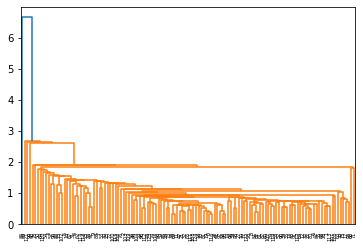

In [70]:
mergings = linkage(dfScaled, method= 'single')
dendrogram(mergings)
plt.show()

In [76]:
labels = cut_tree(mergings, n_clusters=4)
labels = labels.reshape(-1, )
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0])

In [77]:
dfhier = df.copy()
dfhier['labels'] = labels

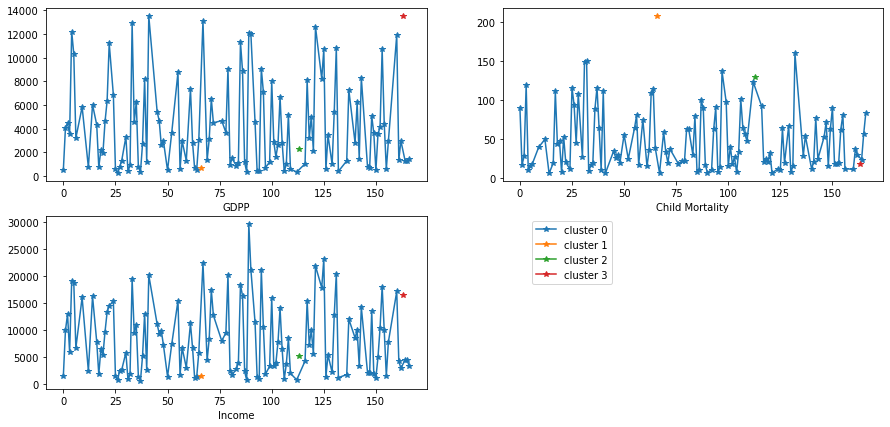

In [79]:
fig, ax = plt.subplots(2, 2, figsize= (15,7))

ax[0,0].plot(dfhier[dfhier.labels == 0].gdpp, label= 'cluster 0', marker= '*')
ax[0,0].plot(dfhier[dfhier.labels == 1].gdpp, label= 'cluster 1', marker= '*')
ax[0,0].plot(dfhier[dfhier.labels == 2].gdpp, label= 'cluster 2', marker= '*')
ax[0,0].plot(dfhier[dfhier.labels == 3].gdpp, label= 'cluster 3', marker= '*')
ax[0,0].set_xlabel('GDPP')

ax[0,1].plot(dfhier[dfhier.labels == 0].child_mort, label= 'cluster 0', marker= '*')
ax[0,1].plot(dfhier[dfhier.labels == 1].child_mort, label= 'cluster 1', marker= '*')
ax[0,1].plot(dfhier[dfhier.labels == 2].child_mort, label= 'cluster 2', marker= '*')
ax[0,1].plot(dfhier[dfhier.labels == 3].child_mort, label= 'cluster 3', marker= '*')
ax[0,1].set_xlabel('Child Mortality')

ax[1,0].plot(dfhier[dfhier.labels == 0].income, label= 'cluster 0', marker= '*')
ax[1,0].plot(dfhier[dfhier.labels == 1].income, label= 'cluster 1', marker= '*')
ax[1,0].plot(dfhier[dfhier.labels == 2].income, label= 'cluster 2', marker= '*')
ax[1,0].plot(dfhier[dfhier.labels == 3].income, label= 'cluster 3', marker= '*')
ax[1,0].set_xlabel('Income')

ax[1,1].axis('off')
ax[1,0].legend(bbox_to_anchor=(1.5, 1))

With Single Linkage Hierarchical clustering, we can see one cluster acquiring most of the data points, and the remaining clusters acquire single points, the clustering here is bad considering the hopkins test did get a good score with the data points 

## Hierarchical clustering - Complete linkage

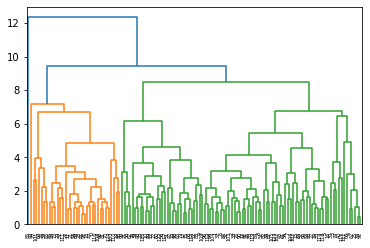

In [303]:
mergings = linkage(dfScaled, method= 'complete')
dendrogram(mergings)
plt.show()

In [320]:
labels = cut_tree(mergings, n_clusters=4)
labels = labels.reshape(-1, )
labels

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 2, 0, 0, 2, 0,
       2, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1,
       1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 2, 0, 0,
       1, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 3, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2,
       0, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0])

In [321]:
dfHier = df.copy()
dfHier['labels'] = labels

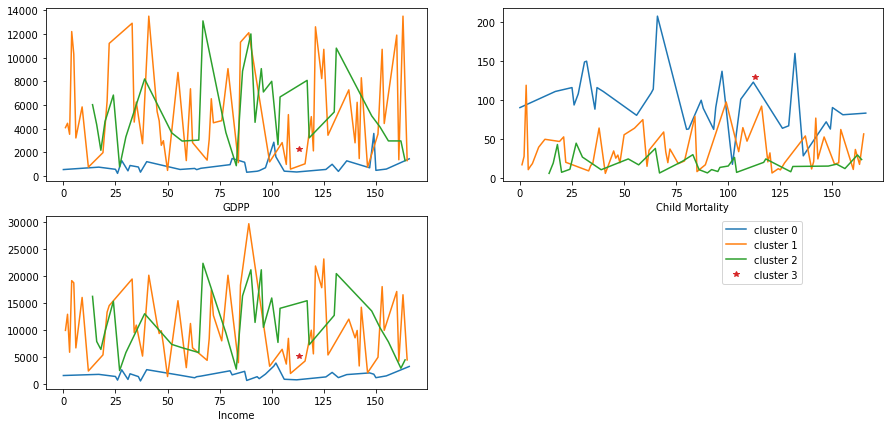

In [391]:
fig, ax = plt.subplots(2, 2, figsize= (15,7))

ax[0,0].plot(dfHier[dfHier.labels == 0].gdpp, label= 'cluster 0')
ax[0,0].plot(dfHier[dfHier.labels == 1].gdpp, label= 'cluster 1')
ax[0,0].plot(dfHier[dfHier.labels == 2].gdpp, label= 'cluster 2')
ax[0,0].plot(dfHier[dfHier.labels == 3].gdpp, '*', label= 'cluster 3')
ax[0,0].set_xlabel('GDPP')

ax[0,1].plot(dfHier[dfHier.labels == 0].child_mort, label= 'cluster 0')
ax[0,1].plot(dfHier[dfHier.labels == 1].child_mort, label= 'cluster 1')
ax[0,1].plot(dfHier[dfHier.labels == 2].child_mort, label= 'cluster 2')
ax[0,1].plot(dfHier[dfHier.labels == 3].child_mort, '*', label= 'cluster 3')
ax[0,1].set_xlabel('Child Mortality')

ax[1,0].plot(dfHier[dfHier.labels == 0].income, label= 'cluster 0')
ax[1,0].plot(dfHier[dfHier.labels == 1].income, label= 'cluster 1')
ax[1,0].plot(dfHier[dfHier.labels == 2].income, label= 'cluster 2')
ax[1,0].plot(dfHier[dfHier.labels == 3].income, '*', label= 'cluster 3')
ax[1,0].set_xlabel('Income')

ax[1,1].axis('off')
ax[1,0].legend(bbox_to_anchor=(2, 1))

Even with complete linkage **hierarchical clusterings** did not perform well in this data as we can see in the above graphs, hierarchical clustering failed to form unique clusters as clusters 2 and 3 from above graphs, show they overlap each other.<br>
On the other hand we see **K-means** clustering can perfectly form **3 clusters**, that are different from each other

Therefore, we are choosing **K-means (K = 3)** as the final clustering algorithm

### Final Model:  K-means (K = 3)

In [96]:
kmeans = KMeans(n_clusters= 3, max_iter= 50, random_state=1)
kmeans.fit_predict(dfScaled)
labels = kmeans.labels_
labels

array([2, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 2, 2, 1, 2,
       1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2,
       0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2,
       0, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1,
       2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 2, 2])

In [91]:
dfKmeans = df.copy()
dfKmeans['labels'] = labels

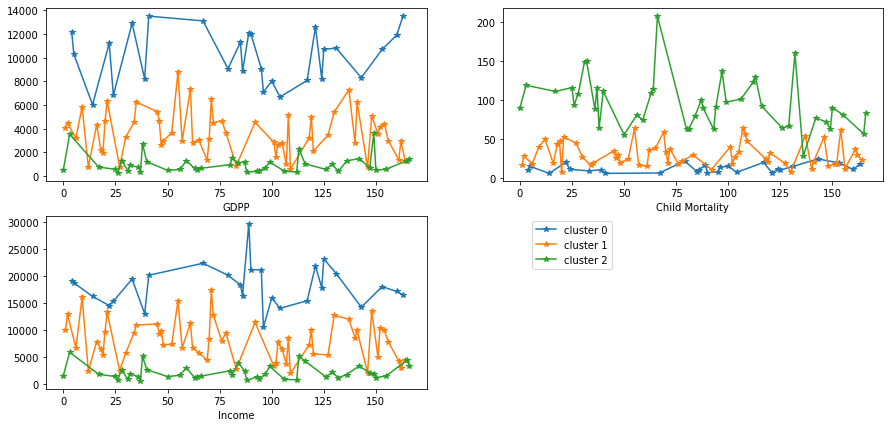

In [92]:
fig, ax = plt.subplots(2, 2, figsize= (15,7))

ax[0,0].plot(dfKmeans[dfKmeans.labels == 0].gdpp, label= 'cluster 0', marker= '*')
ax[0,0].plot(dfKmeans[dfKmeans.labels == 1].gdpp, label= 'cluster 1', marker= '*')
ax[0,0].plot(dfKmeans[dfKmeans.labels == 2].gdpp, label= 'cluster 2', marker= '*')
ax[0,0].set_xlabel('GDPP')

ax[0,1].plot(dfKmeans[dfKmeans.labels == 0].child_mort, label= 'cluster 0', marker= '*')
ax[0,1].plot(dfKmeans[dfKmeans.labels == 1].child_mort, label= 'cluster 1', marker= '*')
ax[0,1].plot(dfKmeans[dfKmeans.labels == 2].child_mort, label= 'cluster 2', marker= '*')
ax[0,1].set_xlabel('Child Mortality')

ax[1,0].plot(dfKmeans[dfKmeans.labels == 0].income, label= 'cluster 0', marker= '*')
ax[1,0].plot(dfKmeans[dfKmeans.labels == 1].income, label= 'cluster 1', marker= '*')
ax[1,0].plot(dfKmeans[dfKmeans.labels == 2].income, label= 'cluster 2', marker= '*')
ax[1,0].set_xlabel('Income')

ax[1,1].axis('off')
ax[1,0].legend(bbox_to_anchor=(1.5, 1))

In [97]:
pd.DataFrame({'GDPP (Cluster 0)': dfKmeans[dfKmeans.labels == 0].gdpp.describe(),
             'GDPP (Cluster 1)': dfKmeans[dfKmeans.labels == 1].gdpp.describe(),
             'GDPP (Cluster 2)': dfKmeans[dfKmeans.labels == 2].gdpp.describe(),
             'Child_mort (Cluster 0)': dfKmeans[dfKmeans.labels == 0].child_mort.describe(),
             'Child_mort (Cluster 1)': dfKmeans[dfKmeans.labels == 1].child_mort.describe(),
             'Child_mort (Cluster 2)': dfKmeans[dfKmeans.labels == 2].child_mort.describe(),
             'Income (Cluster 0)': dfKmeans[dfKmeans.labels == 0].income.describe(),
             'Income (Cluster 1)': dfKmeans[dfKmeans.labels == 1].income.describe(),
             'Income (Cluster 2)': dfKmeans[dfKmeans.labels == 2].income.describe()})

,GDPP (Cluster 0),GDPP (Cluster 1),GDPP (Cluster 2),Child_mort (Cluster 0),Child_mort (Cluster 1),Child_mort (Cluster 2),Income (Cluster 0),Income (Cluster 1),Income (Cluster 2)
count,27.000000,56.000000,42.000000,27.000000,56.00000,42.000000,27.000000,56.000000,42.000000
mean,10120.740741,3663.964286,1011.238095,12.185185,30.13750,95.797619,18140.740741,8077.678571,2178.880952
std,2284.933808,1864.491605,779.301777,5.393208,15.42135,33.582657,3833.782954,3700.219154,1323.718970
min,6030.000000,592.000000,231.000000,5.500000,6.90000,28.100000,10500.000000,1990.000000,609.000000
25%,8215.000000,2637.500000,502.750000,7.850000,18.10000,72.600000,15650.000000,5407.500000,1360.000000
50%,10700.000000,3380.000000,733.000000,10.600000,26.30000,90.400000,18000.000000,7850.000000,1755.000000
75%,12050.000000,4665.000000,1272.500000,15.800000,39.40000,113.250000,20250.000000,10070.000000,2682.500000
max,13500.000000,8750.000000,3600.000000,24.100000,64.40000,208.000000,29600.000000,17400.000000,5900.000000


Inferences from the graph and decribe of final model
- The 3 clusters have been formed, where each cluster can be easily differentiated from one another
- Cluster 0 are countries which has great GDPP, income and least child mortality
- Cluster 1 are countries which has GDPP and income not as great as cluster 0 and not worse as cluster 2
- **Cluster 2 are countries which are in dire need of help** since their GDPP and income is bad and child mortality rate is worse than others

#### Top Countries which are in need of help from the NGO

In [106]:
#retriving data points from 2nd cluster (countries which are in need)
cluster2 = dfKmeans[dfKmeans.labels == 2]
cluster2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,2
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,2
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,2


In [107]:
cluster2.shape

(42, 11)

There are 42 countries which are requires help, but we need to choose atleast 5 countries

In [109]:
finaldf = cluster2.sort_values(['gdpp', 'income', 'child_mort'], ascending= ['True', 'True', 'False'])
finaldf = finaldf[['country', 'gdpp', 'income', 'child_mort']]
finaldf.head(10)

,country,gdpp,income,child_mort
26,Burundi,231.0,764.0,93.6
88,Liberia,327.0,700.0,89.3
37,"Congo, Dem. Rep.",334.0,609.0,116.0
112,Niger,348.0,814.0,123.0
132,Sierra Leone,399.0,1220.0,160.0
93,Madagascar,413.0,1390.0,62.2
106,Mozambique,419.0,918.0,101.0
31,Central African Republic,446.0,888.0,149.0
94,Malawi,459.0,1030.0,90.5
50,Eritrea,482.0,1420.0,55.2


In [112]:
finaldf.head(10).country.to_list()

['Burundi',
 'Liberia',
 'Congo, Dem. Rep.',
 'Niger',
 'Sierra Leone',
 'Madagascar',
 'Mozambique',
 'Central African Republic',
 'Malawi',
 'Eritrea']

Therefore, the top 10 countries which require immediate help from the NGO are 
    **Burundi, 
 Liberia, 
 'Congo, Dem. Rep.', 
 Niger, 
 Sierra Leone, 
 Madagascar, 
 Mozambique, 
 Central African Republic, 
 Malawi, 
 Eritrea**